In [33]:
import os
os.getcwd() 

os.chdir('D:\\night_lights')


In [34]:
import numpy as np
import netCDF4 as nc
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime
from datetime import date
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

In [35]:
# open the rainfall dataset with xarray and check variables
ts = xr.open_dataset('BDGR_High_Res_Monthly_Rainfall_1901-2018.nc')
ts

<xarray.Dataset>
Dimensions:               (Day: 1416, lat: 600, lon: 463)
Coordinates:
  * lon                   (lon) float64 88.01 88.02 88.03 ... 92.61 92.62 92.63
  * lat                   (lat) float64 26.63 26.62 26.61 ... 20.66 20.65 20.64
  * Day                   (Day) float64 1.901e+07 1.901e+07 ... 2.018e+07
Data variables:
    precipitation_amount  (Day, lat, lon) float32 ...
Attributes: (12/14)
    cf-conventions:      1.9
    Title:               Long-term High-resolution Gridded Rainfall product f...
    Short title:         BDGR
    Version:             BDGR_01
    Time Span:           January 1901 to December 2018
    Time Resolution:     Monthly Cumulative
    ...                  ...
    DOI:                 https://doi.org/10.6084/m9.figshare.16607912
    References:          Dewan, Ashraf; Shahid, Shamsuddin; Bhuian, Md. Hanif...
    Developers:          Ashraf Dewan1, Shamsuddin Shahid2, Md. Hanif Bhuian3...
    Institute:           1 Spatial Sciences discipline, Curtin University, Ke...
    Note:                Kindly, cite both the data and the reference paper a...
    History:             M.S. Nashwan On Fri Apr 22 04:35:42 2022

In [36]:
ts.Day
#need to create a time formatted series
d =  pd.date_range("1901-01-15", freq="M", periods=1416) 
type(d)


pandas.core.indexes.datetimes.DatetimeIndex

In [37]:
ts["Day"] = d
ts

<xarray.Dataset>
Dimensions:               (Day: 1416, lat: 600, lon: 463)
Coordinates:
  * lon                   (lon) float64 88.01 88.02 88.03 ... 92.61 92.62 92.63
  * lat                   (lat) float64 26.63 26.62 26.61 ... 20.66 20.65 20.64
  * Day                   (Day) datetime64[ns] 1901-01-31 ... 2018-12-31
Data variables:
    precipitation_amount  (Day, lat, lon) float32 ...
Attributes: (12/14)
    cf-conventions:      1.9
    Title:               Long-term High-resolution Gridded Rainfall product f...
    Short title:         BDGR
    Version:             BDGR_01
    Time Span:           January 1901 to December 2018
    Time Resolution:     Monthly Cumulative
    ...                  ...
    DOI:                 https://doi.org/10.6084/m9.figshare.16607912
    References:          Dewan, Ashraf; Shahid, Shamsuddin; Bhuian, Md. Hanif...
    Developers:          Ashraf Dewan1, Shamsuddin Shahid2, Md. Hanif Bhuian3...
    Institute:           1 Spatial Sciences discipline, Curtin University, Ke...
    Note:                Kindly, cite both the data and the reference paper a...
    History:             M.S. Nashwan On Fri Apr 22 04:35:42 2022

In [38]:
#This will aggregate the monthly timeseries to quarterly data.
ts_quarterly = ts.resample(Day="3M").sum()



In [39]:
ts_quarterly.dims

Frozen(SortedKeysDict({'Day': 473, 'lat': 600, 'lon': 463}))

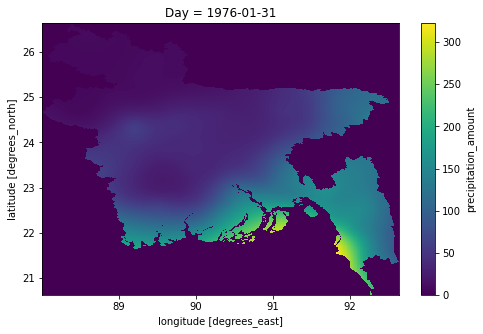

In [30]:
#plot some data to have a look

ts_quarterly.precipitation_amount.isel(Day=300).plot()

#some dates have errors, e.g. index 100, 200, 

In [31]:
import xagg

ModuleNotFoundError: No module named 'xagg'